# Problema 1 sección 5.4 ejercicio 8

8. We will now perform cross-validation on a simulated data set.

(a) Generate a simulated data set as follows:

`rng = np.random.default_rng(1)`

`x = rng.normal(size=100)`

`y = x - 2 * x**2 + rng.normal(size=100)`

In this data set, what is ***n*** and what is ***p***?

Write out the model used to generate the data in equation form.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut

In [2]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

***n***: es el número de observaciones, que en este caso es 100

In [3]:
print("Número de observaciones (n) de 'x' ^ 'y' = ", len(x))

Número de observaciones (n) de 'x' ^ 'y' =  100


***p***: Es el número de predictores del modelo, en este contexto `p`= 1 porque solo hay una variable predictora que es `x`.

El modelo usado para generar `y`, es una ecuacuión cuadrática que puede ser escrita como:

$$y=\beta_0 + \beta_1 x + \beta_2 x^2+ \varepsilon


Donde:

$$ \beta_0 = 0 , \beta_1 = 1, 
 \beta_2 = -2

Por lo tanto, la función se puede escribir como:

$$ y= x -2 x^2 + \varepsilon


(b) Create a scatterplot of X against Y . Comment on what you fnd.

In [10]:
df=pd.DataFrame({"y":y,"x":x})
df.head()

,y,x
0,-0.544554,0.345584
1,0.333950,0.821618
2,-0.013532,0.330437
3,-4.030442,-1.303157
4,0.484861,0.905356


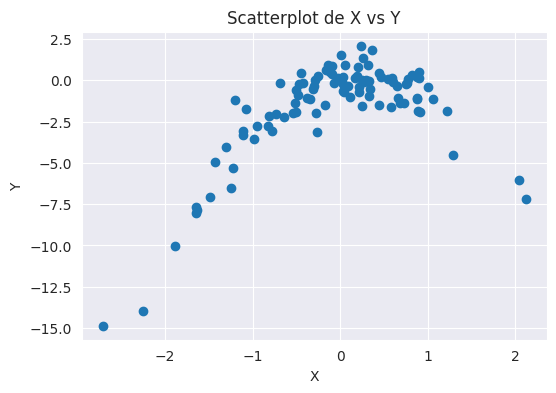

In [15]:
plt.figure(figsize=(6,4))
sns.set_style("darkgrid")
fig=plt.scatter(df["x"],df["y"])
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot de X vs Y")

plt.show()

Se puede evidenciar que no existe una relación lineal entre los datos. Por el contrario, existe una relación cuadrática, lo cual tiene sentido con la definición de la función.

(c) Set a random seed, and then compute the LOOCV errors that result from ftting the following four models using least squares:

$$ 1. Y = \beta_0 + \beta_1X + \varepsilon \\  2. Y = \beta_0 + \beta_1X + \beta_2X^2+\varepsilon \\ 3. Y = \beta_0 + \beta_1X + \beta_2X^2+\beta_3X^3+\varepsilon \\ 4. Y = \beta_0 + \beta_1X + \beta_2X^2+\beta_3X^3+\beta_4X^4+\varepsilon

#### Implementando el proceso manual

In [59]:
# Model 1: Y = β0 + β1X + E
model_1_formula = 'y ~ x'
model_1_errors = []

# Model 2: Y = β0 + β1X + β2X2 + E
model_2_formula = 'y ~ x + np.power(x, 2)'
model_2_errors = []

# Model 3: Y = β0 + β1X + β2X2 + β3X3 + E
model_3_formula = 'y ~ x + np.power(x, 2) + np.power(x, 3)'
model_3_errors = []

# Model 4: Y = β0 + β1X + β2X2 + β3X3 + β4X4 + E
model_4_formula = 'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'
model_4_errors = []

# Set a random seed
np.random.seed(42)

# Leave-One-Out Cross-Validation
for i in range(len(df)):
    # Prepare the data for each iteration
    train_data = df.drop(index=i)
    test_data = df.iloc[i]

    # Model i
    model_1 = sm.OLS.from_formula(model_1_formula, data=train_data).fit()
    model_1_errors.append((test_data['y'] - model_1.predict(test_data)) ** 2)

    # Model ii
    model_2 = sm.OLS.from_formula(model_2_formula, data=train_data).fit()
    model_2_errors.append((test_data['y'] - model_2.predict(test_data)) ** 2)

    # Model iii
    model_3 = sm.OLS.from_formula(model_3_formula, data=train_data).fit()
    model_3_errors.append((test_data['y'] - model_3.predict(test_data)) ** 2)

    # Model iv
    model_4 = sm.OLS.from_formula(model_4_formula, data=train_data).fit()
    model_4_errors.append((test_data['y'] - model_4.predict(test_data)) ** 2)

# Calculate Mean Squared Error (MSE) for each model
mse_model_1 = np.mean(model_1_errors)
mse_model_2 = np.mean(model_2_errors)
mse_model_3 = np.mean(model_3_errors)
mse_model_4 = np.mean(model_4_errors)

print(f'MSE Model 1: {mse_model_1}')
print(f'MSE Model 2: {mse_model_2}')
print(f'MSE Model 3: {mse_model_3}')
print(f'MSE Model 4: {mse_model_4}')

MSE Model 1: 6.633029839181983
MSE Model 2: 1.1229368563419688
MSE Model 3: 1.3017965489358871
MSE Model 4: 1.3323942694179303


#### Implementando el proceso con librería de ScikitLearn

In [63]:
# Models
model_formulas = [
    'y ~ x',
    'y ~ x + np.power(x, 2)',
    'y ~ x + np.power(x, 2) + np.power(x, 3)',
    'y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4)'
]

# Leave-One-Out Cross-Validation
loo = LeaveOneOut()

avg_mse_scores=[]

for formula in model_formulas:
    mse_scores = []
    for train_index, test_index in loo.split(df):
        train_data, test_data = df.iloc[train_index], df.iloc[test_index]

        # Fit the model using statsmodels
        model = sm.OLS.from_formula(formula, data=train_data).fit()

        # Make predictions on the test set
        predictions = model.predict(test_data)

        # Calculate mean squared error
        mse = np.mean((test_data['y'] - predictions) ** 2)
        mse_scores.append(mse)

    # Calculate Mean Squared Error (MSE) for each model
    avg_mse = np.mean(mse_scores)

    # Display the results
    print(f'MSE for model {formula}: {avg_mse}')
    avg_mse_scores.append(avg_mse)

MSE for model y ~ x: 6.633029839181983
MSE for model y ~ x + np.power(x, 2): 1.1229368563419688
MSE for model y ~ x + np.power(x, 2) + np.power(x, 3): 1.3017965489358871
MSE for model y ~ x + np.power(x, 2) + np.power(x, 3) + np.power(x, 4): 1.3323942694179303


In [67]:
df_LOOCV=pd.DataFrame({"Polinomio":[1,2,3,4],
        "MSE_Manual":[mse_model_1,mse_model_2,mse_model_3,mse_model_4],
        "MSE_SkLearn":avg_mse_scores})

df_LOOCV.head()

,Polinomio,MSE_Manual,MSE_SkLearn
0,1,6.633030,6.633030
1,2,1.122937,1.122937
2,3,1.301797,1.301797
3,4,1.332394,1.332394


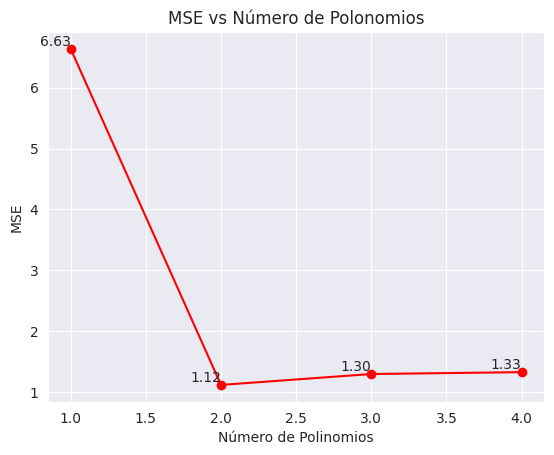

In [69]:
# Create a line plot
fig, ax = plt.subplots()
line = ax.plot(df_LOOCV["Polinomio"], df_LOOCV["MSE_SkLearn"], marker='o', color="red")

# Add labels to the values
for i, txt in enumerate(df_LOOCV["MSE_SkLearn"]):
    ax.text(df_LOOCV["Polinomio"][i], df_LOOCV["MSE_SkLearn"][i], f'{txt:.2f}', ha='right', va='bottom')

# Adding labels and title
plt.xlabel("Número de Polinomios")
plt.ylabel("MSE")
plt.title("MSE vs Número de Polonomios")
plt.show()

(d) Repeat (c) using another random seed, and report your results. Are your results the same as what you got in (c)? Why?

Dado que en `Leave-One-Out-Cross-Validation`, no se usa una distribución aleatoria, sino que se utiliza cada uno de las observaciones del dataset tanto en validación como en training, la `random seed` no tiene ningún efecto en los resultados.

(e) Which of the models in (c) had the smallest LOOCV error? Is this what you expected? Explain your answer.

El modelo que tiene un menor LOOCV Error es el que usa solo dos polinomios, es decir:

$$Y=\beta_0+\beta_1X+\beta_2X^2+\varepsilon$$

Esto tiene sentido, dado que los valores de Y, se generaron utilizando X y X al cuadrado.

(f) Comment on the statistical signifcance of the coefcient estimates that results from ftting each of the models in (c) using
least squares. Do these results agree with the conclusions drawn
based on the cross-validation results?

#### Evaluación de significancia estadística de los coeficientes

Los coeficientes son estadísticamente significativos cuando se rechaza la Hipótesis nula de que sea igual a cero. Esto se hace cuando `p-value`<`alpha`

**Modelo1**: 

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes y, por lo tanto, todos son estadísticamente significativos.

In [84]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.317
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     45.06
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           1.29e-09
Time:                        11:57:28   Log-Likelihood:                -229.02
No. Observations:                  99   AIC:                             462.0
Df Residuals:                      97   BIC:                             467.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.4635      0.249     -5.869      0.000      -1.958      -0.969
x              1.9501      0.291      6.713      0.000       1.374       2.527
==============================================================================
Omnibus:                       52.008   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              144.499
Skew:                          -1.945   Prob(JB):                     4.19e-32
Kurtosis:                       7.460   Cond. No.                         1.19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo2**: 

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.

In [86]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                     379.6
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           2.57e-46
Time:                        11:59:55   Log-Likelihood:                -139.65
No. Observations:                  99   AIC:                             285.3
Df Residuals:                      96   BIC:                             293.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0600      0.120     -0.501      0.618      -0.298       0.178
x                  0.9702      0.126      7.673      0.000       0.719       1.221
np.power(x, 2)    -2.0081      0.091    -22.089      0.000      -2.189      -1.828
==============================================================================
Omnibus:                        1.439   Durbin-Watson:                   2.192
Prob(Omnibus):                  0.487   Jarque-Bera (JB):                0.905
Skew:                           0.109   Prob(JB):                        0.636
Kurtosis:                       3.414   Cond. No.                         2.23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo3**: 

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto y `X**3` y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.

In [87]:
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                     254.2
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.02e-45
Time:                        12:00:11   Log-Likelihood:                -139.00
No. Observations:                  99   AIC:                             286.0
Df Residuals:                      95   BIC:                             296.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -0.0429      0.121     -0.355      0.723      -0.282       0.197
x                  1.1265      0.188      6.001      0.000       0.754       1.499
np.power(x, 2)    -2.0529      0.099    -20.708      0.000      -2.250      -1.856
np.power(x, 3)    -0.0677      0.060     -1.125      0.263      -0.187       0.052
==============================================================================
Omnibus:                        0.944   Durbin-Watson:                   2.191
Prob(Omnibus):                  0.624   Jarque-Bera (JB):                0.466
Skew:                           0.038   Prob(JB):                        0.792
Kurtosis:                       3.327   Cond. No.                         5.96
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Modelo4**: 

A un nivel de significancia estadística del 1%, se rechaza la hipótesis nula para todos los coeficientes a excepción del interpecto, `X**3` y `X**4` y, por lo tanto, `X` y `X**2` son estadísticamente significaivos.

In [88]:
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     200.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           3.76e-45
Time:                        12:00:38   Log-Likelihood:                -136.21
No. Observations:                  99   AIC:                             282.4
Df Residuals:                      94   BIC:                             295.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.1172      0.136      0.859      0.393      -0.154       0.388
x                  0.9156      0.205      4.475      0.000       0.509       1.322
np.power(x, 2)    -2.5161      0.221    -11.386      0.000      -2.955      -2.077
np.power(x, 3)     0.0311      0.072      0.430      0.669      -0.113       0.175
np.power(x, 4)     0.1052      0.045      2.332      0.022       0.016       0.195
==============================================================================
Omnibus:                        2.661   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.264   Jarque-Bera (JB):                2.377
Skew:                           0.105   Prob(JB):                        0.305
Kurtosis:                       3.729   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Estas conclusiones están alineadas con lo mencionado en los resultados de Cross-Validation y con la definición de la variable Y. Dado que solo son estadísticamente significativos los coeficientes que componen a Y, y que están en el modelo que tiene el menor error de validación.
